#### Attempt to perform data analysis of Fifa 2019 players

In [2]:
# Importing the packages

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading the data
master_data = pd.read_csv("Kaggle_Datasets/Fifa19Players.csv",index_col = 0) #Removing the defualt index

In [4]:
pd.set_option('display.max_rows', None) # To display unlimited rows
pd.set_option('display.max_columns', None) # To display all the columns available

In [203]:
master_data.shape

(18207, 88)

In [6]:
fifaplayers_copy = master_data.copy() # Creating a deep copy to perform the analysis

In [7]:
len(fifaplayers_copy.columns)

88

In [8]:
fifaplayers_copy.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [9]:
fifaplayers_copy.drop(labels = ['Photo','Flag','Club Logo','Value','Wage','Body Type','Real Face','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight','Release Clause'], axis = 1, inplace = True)

In [10]:
len(fifaplayers_copy.columns) # Dropped non essential columns required to analyze players abolities

74

In [11]:
fifaplayers_copy.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,High/ Low,ST,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,High/ Medium,LW,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,High/ High,RCM,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [12]:
pd.unique(fifaplayers_copy['Preferred Foot'])

array(['Left', 'Right', nan], dtype=object)

In [13]:
leftFootPlayers = fifaplayers_copy[fifaplayers_copy['Preferred Foot'] == 'Left']

In [14]:
pd.unique(leftFootPlayers['Preferred Foot'])

array(['Left'], dtype=object)

In [15]:
leftFootPlayers.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
13,168542,David Silva,32,Spain,90,90,Manchester City,2115,Left,4.0,2.0,4.0,High/ Medium,LCM,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,2092,Left,3.0,3.0,4.0,High/ Medium,LF,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,87+3,87+3,87+3,86+3,79+3,79+3,79+3,86+3,62+3,58+3,58+3,58+3,62+3,56+3,45+3,45+3,45+3,56+3,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,2246,Left,4.0,3.0,4.0,High/ High,CAM,86+3,86+3,86+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,67+3,67+3,67+3,70+3,67+3,61+3,61+3,61+3,67+3,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0
19,192119,T. Courtois,26,Belgium,89,90,Real Madrid,1311,Left,4.0,2.0,1.0,Medium/ Medium,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0


In [16]:
leftFootPlayers.shape

(4211, 74)

### 1. Find the best left foot finisher in each club

In [91]:
Best_finishers = leftFootPlayers[['ID','Club','Finishing','Name']]

In [92]:
Best_finishers = Best_finishers.set_index(['ID'])

In [708]:
Best_finishers.head()

,ID,Club,Finishing,Name
0,158023,FC Barcelona,95.0,L. Messi
1,209331,Liverpool,90.0,M. Salah
2,194765,Atlético Madrid,90.0,A. Griezmann
3,192629,RC Celta,88.0,Iago Aspas
4,205175,Napoli,88.0,A. Milik


In [93]:
Best_finishers = Best_finishers.sort_values(by = ['Finishing','Club'] , ascending = False)

In [41]:
#Best_finishers.Finishing.idxmax()

'FC Barcelona'

In [128]:
mask = Best_finishers.groupby(['Club'], sort=False)['Finishing'].idxmax()

In [129]:
mask = pd.DataFrame(mask)

In [130]:
mask.rename(columns = {'Finishing':'ID'}, inplace = True)

In [604]:
#mask = mask.reset_index()
mask.drop(labels = ['level_0','index'],axis = 1, inplace = True)

In [605]:
mask

,Club,ID
0,FC Barcelona,158023
1,Liverpool,209331
2,Atlético Madrid,194765
3,RC Celta,192629
4,Napoli,205175
5,Manchester United,192505
6,Real Madrid,173731
7,FC Schalke 04,200318
8,FC Bayern München,9014
9,Juventus,211110


In [116]:
Best_finishers

,Club,Finishing,Name
ID,,,
158023,FC Barcelona,95.0,L. Messi
209331,Liverpool,90.0,M. Salah
194765,Atlético Madrid,90.0,A. Griezmann
192629,RC Celta,88.0,Iago Aspas
205175,Napoli,88.0,A. Milik
192505,Manchester United,87.0,R. Lukaku
173731,Real Madrid,86.0,G. Bale
200318,FC Schalke 04,85.0,M. Uth
9014,FC Bayern München,85.0,A. Robben


In [133]:
Best_finishers = pd.merge(Best_finishers, mask, on = 'ID')

In [135]:
Best_finishers.drop(labels = ['Club_y'], axis = 1, inplace = True)

In [136]:
Best_finishers.rename(columns = {'Club_x':'Club'}, inplace = True)

In [709]:
Best_finishers.head() # Best Finishers of left foot players in 2019

,ID,Club,Finishing,Name
0,158023,FC Barcelona,95.0,L. Messi
1,209331,Liverpool,90.0,M. Salah
2,194765,Atlético Madrid,90.0,A. Griezmann
3,192629,RC Celta,88.0,Iago Aspas
4,205175,Napoli,88.0,A. Milik


### 2. Categorize the players based on their finishing and show the count for each category using seaborn

In [167]:
Best_finishers_copy = Best_finishers.copy()

In [161]:
Best_finishers_copy

,ID,Club,Finishing,Name
0,158023,FC Barcelona,95.0,L. Messi
1,209331,Liverpool,90.0,M. Salah
2,194765,Atlético Madrid,90.0,A. Griezmann
3,192629,RC Celta,88.0,Iago Aspas
4,205175,Napoli,88.0,A. Milik
5,192505,Manchester United,87.0,R. Lukaku
6,173731,Real Madrid,86.0,G. Bale
7,200318,FC Schalke 04,85.0,M. Uth
8,9014,FC Bayern München,85.0,A. Robben
9,211110,Juventus,84.0,P. Dybala


In [196]:
for row_index,row in Best_finishers_copy.iterrows():
    if row.Finishing >= 85.0:
        Best_finishers_copy.loc[row_index,'SkillLevel'] = 'Professional'
    elif (row.Finishing >= 70.0) & (row.Finishing < 85.0) :
        Best_finishers_copy.loc[row_index,'SkillLevel'] = 'Advanced'
    elif (row.Finishing >= 50.0) & (row.Finishing < 70.0) :
        Best_finishers_copy.loc[row_index,'SkillLevel'] = 'Average'
    else:
        Best_finishers_copy.loc[row_index,'SkillLevel'] = 'Below Average'

In [197]:
Best_finishers_copy

,ID,Club,Finishing,Name,SkillLevel
0,158023,FC Barcelona,95.0,L. Messi,Professional
1,209331,Liverpool,90.0,M. Salah,Professional
2,194765,Atlético Madrid,90.0,A. Griezmann,Professional
3,192629,RC Celta,88.0,Iago Aspas,Professional
4,205175,Napoli,88.0,A. Milik,Professional
5,192505,Manchester United,87.0,R. Lukaku,Professional
6,173731,Real Madrid,86.0,G. Bale,Professional
7,200318,FC Schalke 04,85.0,M. Uth,Professional
8,9014,FC Bayern München,85.0,A. Robben,Professional
9,211110,Juventus,84.0,P. Dybala,Advanced


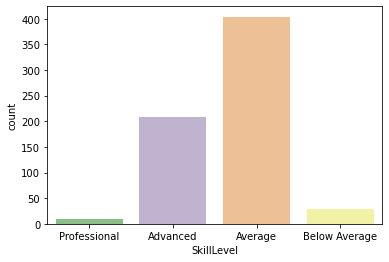

In [201]:
sb.countplot("SkillLevel",
              data = Best_finishers_copy,
              palette = "Accent")

plt.show()

### 3. Top 7 Economical Club, Richest Club, Clubs paying the high wages to their players

In [516]:
# Creating a copy of master data
fifaplayers_copy1 = master_data.copy()
fifaplayers_copy1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [517]:
# Removing the non-essential rows for the analysis
fifaplayers_copy1 = fifaplayers_copy1[['ID','Name','Club','Value','Wage','Potential']]

In [491]:
# Couting the null records
fifaplayers_copy1.isnull().sum()

ID             0
Name           0
Club         241
Value          0
Wage           0
Potential      0
dtype: int64

In [492]:
fifaplayers_copy1.shape

(18207, 6)

In [518]:
# Dropping the players having no club details
fifaplayers_copy1.dropna(subset=['Club'], inplace = True)

In [519]:
fifaplayers_copy1.shape # Removed the players with no club details (18207 - 17966 = 241)

(17966, 6)

In [494]:
fifaplayers_copy1.head()

,ID,Name,Club,Value,Wage,Potential
0,158023,L. Messi,FC Barcelona,€110.5M,€565K,94
1,20801,Cristiano Ronaldo,Juventus,€77M,€405K,94
2,190871,Neymar Jr,Paris Saint-Germain,€118.5M,€290K,93
3,193080,De Gea,Manchester United,€72M,€260K,93
4,192985,K. De Bruyne,Manchester City,€102M,€355K,92


In [226]:
# The Data type of Value and Wage are object, numerical operations could not be performed in this data type
# Data Cleaning must be done
fifaplayers_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17966 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         17966 non-null  int64 
 1   Name       17966 non-null  object
 2   Club       17966 non-null  object
 3   Value      17966 non-null  object
 4   Wage       17966 non-null  object
 5   Potential  17966 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 982.5+ KB


In [520]:
# As the Value and Wage has currency symbol in the value, running a loop to remove it
# Using for loop is one method, another method is using slicing operation
for row in fifaplayers_copy1.itertuples():
    fifaplayers_copy1.loc[row.Index,'Value'] = row.Value.lstrip('€')
    fifaplayers_copy1.loc[row.Index,'Wage'] = row.Wage.lstrip('€')

In [496]:
fifaplayers_copy1.head() # Removed the currency symbol

,ID,Name,Club,Value,Wage,Potential
0,158023,L. Messi,FC Barcelona,110.5M,565K,94
1,20801,Cristiano Ronaldo,Juventus,77M,405K,94
2,190871,Neymar Jr,Paris Saint-Germain,118.5M,290K,93
3,193080,De Gea,Manchester United,72M,260K,93
4,192985,K. De Bruyne,Manchester City,102M,355K,92


In [ ]:
# Lets try to create a function to covert K thousands to M millions for Value and Wage columns
# This is required to convert the data type of these attributes in order to derive the economical club

In [521]:
def Conver_KtoM():
    for row in fifaplayers_copy1.itertuples():
        if (fifaplayers_copy1.loc[row.Index,'Value'][-1]) == 'M':
            fifaplayers_copy1.loc[row.Index,'Value'] = fifaplayers_copy1.loc[row.Index,'Value'].rstrip('M')
            fifaplayers_copy1.loc[row.Index,'Value'] = float(fifaplayers_copy1.loc[row.Index,'Value'])
        elif (fifaplayers_copy1.loc[row.Index,'Value'][-1]) == 'K':
            fifaplayers_copy1.loc[row.Index,'Value'] = fifaplayers_copy1.loc[row.Index,'Value'].rstrip('K')
            fifaplayers_copy1.loc[row.Index,'Value'] = float(fifaplayers_copy1.loc[row.Index,'Value'])
            fifaplayers_copy1.loc[row.Index,'Value'] /= 100
        else:
            fifaplayers_copy1.loc[row.Index,'Value'] = float(fifaplayers_copy1.loc[row.Index,'Value'])
        if (fifaplayers_copy1.loc[row.Index,'Wage'][-1]) == 'M':
            fifaplayers_copy1.loc[row.Index,'Wage'] = fifaplayers_copy1.loc[row.Index,'Wage'].rstrip('M')
            fifaplayers_copy1.loc[row.Index,'Wage'] = float(fifaplayers_copy1.loc[row.Index,'Wage'])
        elif (fifaplayers_copy1.loc[row.Index,'Wage'][-1]) == 'K':
            fifaplayers_copy1.loc[row.Index,'Wage'] = fifaplayers_copy1.loc[row.Index,'Wage'].rstrip('K')
            fifaplayers_copy1.loc[row.Index,'Wage'] = float(fifaplayers_copy1.loc[row.Index,'Wage'])
            fifaplayers_copy1.loc[row.Index,'Wage'] /= 100
        else:
            fifaplayers_copy1.loc[row.Index,'Wage'] = float(fifaplayers_copy1.loc[row.Index,'Wage'])
    

In [475]:
fifaplayers_copy1.head()

,ID,Name,Club,Value,Wage,Potential
0,158023,L. Messi,FC Barcelona,110.5M,565K,94
1,20801,Cristiano Ronaldo,Juventus,77M,405K,94
2,190871,Neymar Jr,Paris Saint-Germain,118.5M,290K,93
3,193080,De Gea,Manchester United,72M,260K,93
4,192985,K. De Bruyne,Manchester City,102M,355K,92


In [522]:
Conver_KtoM()

In [523]:
fifaplayers_copy1.head()

,ID,Name,Club,Value,Wage,Potential
0,158023,L. Messi,FC Barcelona,110.5,5.65,94
1,20801,Cristiano Ronaldo,Juventus,77.0,4.05,94
2,190871,Neymar Jr,Paris Saint-Germain,118.5,2.9,93
3,193080,De Gea,Manchester United,72.0,2.6,93
4,192985,K. De Bruyne,Manchester City,102.0,3.55,92


In [524]:
#Covert the datatype of Value and Wage column from object to numeric
fifaplayers_copy1[["Value", "Wage"]] = fifaplayers_copy1[["Value", "Wage"]].apply(pd.to_numeric) 

In [525]:
#The data type of the Value and Wage are changed to float64
fifaplayers_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17966 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         17966 non-null  int64  
 1   Name       17966 non-null  object 
 2   Club       17966 non-null  object 
 3   Value      17966 non-null  float64
 4   Wage       17966 non-null  float64
 5   Potential  17966 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [526]:
fifaplayers_copy1.head()

,ID,Name,Club,Value,Wage,Potential
0,158023,L. Messi,FC Barcelona,110.5,5.65,94
1,20801,Cristiano Ronaldo,Juventus,77.0,4.05,94
2,190871,Neymar Jr,Paris Saint-Germain,118.5,2.90,93
3,193080,De Gea,Manchester United,72.0,2.60,93
4,192985,K. De Bruyne,Manchester City,102.0,3.55,92


In [527]:
fifaplayers_copy1.rename(columns = {'Value':'€Value(M)','Wage':'€Wage(M)'}, inplace = True)

In [657]:
Best_economical_club = fifaplayers_copy1.copy() #Creating a copy

In [628]:
Best_economical_club.head()

,ID,Name,Club,€Value(M),€Wage(M),Potential
0,158023,L. Messi,FC Barcelona,110.5,5.65,94
1,20801,Cristiano Ronaldo,Juventus,77.0,4.05,94
2,190871,Neymar Jr,Paris Saint-Germain,118.5,2.90,93
3,193080,De Gea,Manchester United,72.0,2.60,93
4,192985,K. De Bruyne,Manchester City,102.0,3.55,92


In [658]:
# Calculationg wages for each players per year
Best_economical_club['WagePerYear'] = Best_economical_club['€Wage(M)']*12 

In [630]:
Best_economical_club.head()

,ID,Name,Club,€Value(M),€Wage(M),Potential,WagePerYear
0,158023,L. Messi,FC Barcelona,110.5,5.65,94,67.8
1,20801,Cristiano Ronaldo,Juventus,77.0,4.05,94,48.6
2,190871,Neymar Jr,Paris Saint-Germain,118.5,2.90,93,34.8
3,193080,De Gea,Manchester United,72.0,2.60,93,31.2
4,192985,K. De Bruyne,Manchester City,102.0,3.55,92,42.6


In [695]:
#Finding the sum for each attributes group by the club
Best_economical_club_fifa19 = Best_economical_club.groupby(['Club'], as_index=False, sort=False)[['€Value(M)','€Wage(M)','Potential','WagePerYear']].sum()

In [696]:
Best_economical_club_fifa19 = pd.DataFrame(Best_economical_club_fifa19)

In [663]:
Best_economical_club_fifa19

,Club,€Value(M),€Wage(M),Potential,WagePerYear
0,FC Barcelona,877.80,48.37,2815,580.44
1,Juventus,709.65,32.92,2138,395.04
2,Paris Saint-Germain,655.25,21.61,2507,259.32
3,Manchester United,609.10,33.91,2728,406.92
4,Manchester City,812.25,37.41,2769,448.92
5,Chelsea,624.95,32.49,2727,389.88
6,Real Madrid,914.25,50.17,2793,602.04
7,Atlético Madrid,706.85,15.33,2721,183.96
8,FC Bayern München,717.05,22.86,2426,274.32
9,Tottenham Hotspur,652.20,26.23,2708,314.76


In [659]:
#Best_economical_club_fifa19['NumberOfPlayers'] = Best_economical_club.groupby(['Club'], sort=False)[['ID']].count()

In [697]:
Best_economical_club_fifa19.columns

Index(['Club', '€Value(M)', '€Wage(M)', 'Potential', 'WagePerYear'], dtype='object')

In [699]:
Best_economical_club_fifa19.head()

,Club,€Value(M),€Wage(M),Potential,WagePerYear
0,FC Barcelona,877.80,48.37,2815,580.44
1,Juventus,709.65,32.92,2138,395.04
2,Paris Saint-Germain,655.25,21.61,2507,259.32
3,Manchester United,609.10,33.91,2728,406.92
4,Manchester City,812.25,37.41,2769,448.92


In [700]:
#The club is said to be economical if the difference between its value and wage is high
Best_economical_club_fifa19['Economy'] = Best_economical_club_fifa19['€Value(M)'] - Best_economical_club_fifa19['WagePerYear']

In [701]:
# The top 7 economical clubs
Best_economical_club_fifa19_Economy = Best_economical_club_fifa19.sort_values(by = 'Economy', ascending = False).head(7)

In [702]:
Best_economical_club_fifa19_Economy.reset_index(drop = True)

,Club,€Value(M),€Wage(M),Potential,WagePerYear,Economy
0,Atlético Madrid,706.85,15.33,2721,183.96,522.89
1,FC Bayern München,717.05,22.86,2426,274.32,442.73
2,Paris Saint-Germain,655.25,21.61,2507,259.32,395.93
3,Manchester City,812.25,37.41,2769,448.92,363.33
4,Tottenham Hotspur,652.20,26.23,2708,314.76,337.44
5,Valencia CF,440.35,9.28,2688,111.36,328.99
6,Juventus,709.65,32.92,2138,395.04,314.61


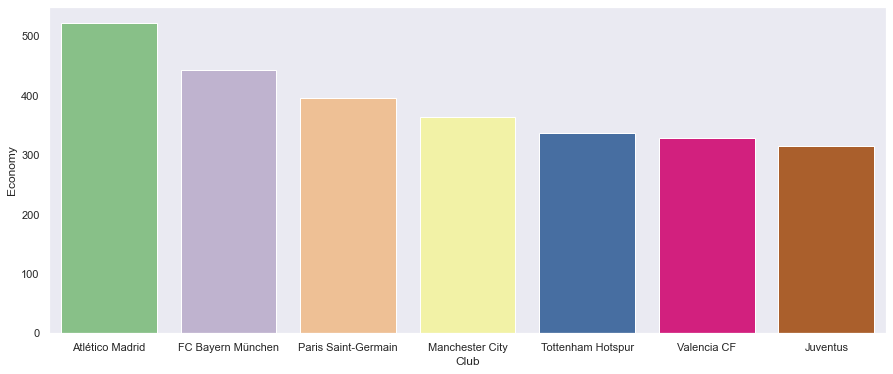

In [703]:
# Plotting the top 7 economical clubs
plt.subplots(figsize = (15,6))

sb.barplot(x = "Club",
            y = "Economy",
            data = Best_economical_club_fifa19_Economy,
            palette = 'Accent')

plt.show()

In [704]:
# The top 7 high paying clubs in millions to their players
Best_economical_club_fifa19_Wage = Best_economical_club_fifa19.sort_values(by = 'WagePerYear', ascending = False).head(7)
Best_economical_club_fifa19_Wage.reset_index(drop = True)

,Club,€Value(M),€Wage(M),Potential,WagePerYear,Economy
0,Real Madrid,914.25,50.17,2793,602.04,312.21
1,FC Barcelona,877.80,48.37,2815,580.44,297.36
2,Manchester City,812.25,37.41,2769,448.92,363.33
3,Manchester United,609.10,33.91,2728,406.92,202.18
4,Juventus,709.65,32.92,2138,395.04,314.61
5,Chelsea,624.95,32.49,2727,389.88,235.07
6,Liverpool,622.45,29.02,2719,348.24,274.21


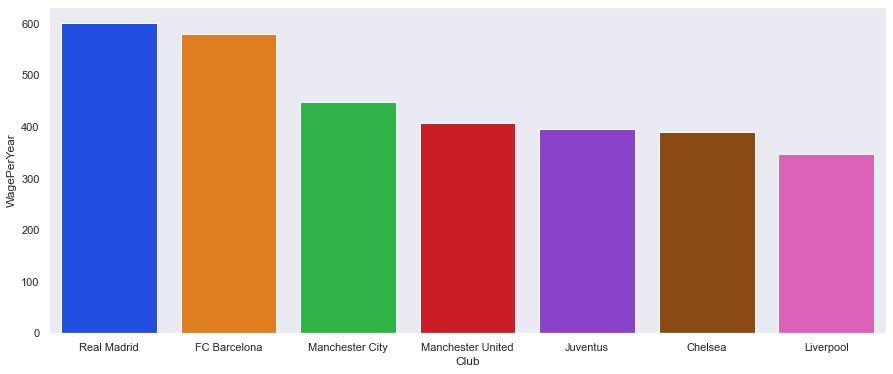

In [705]:
# Plotting the top 7 high paying clubs in millions to their players
plt.subplots(figsize = (15,6))

sb.barplot(x = "Club",
            y = 'WagePerYear',
            data = Best_economical_club_fifa19_Wage)

plt.show()

In [706]:
# The top 7 richest clubs
Best_economical_club_fifa19_value = Best_economical_club_fifa19.sort_values(by = '€Value(M)', ascending = False).head(7)
Best_economical_club_fifa19_value.reset_index(drop = True)

,Club,€Value(M),€Wage(M),Potential,WagePerYear,Economy
0,Real Madrid,914.25,50.17,2793,602.04,312.21
1,FC Barcelona,877.80,48.37,2815,580.44,297.36
2,Manchester City,812.25,37.41,2769,448.92,363.33
3,FC Bayern München,717.05,22.86,2426,274.32,442.73
4,Juventus,709.65,32.92,2138,395.04,314.61
5,Atlético Madrid,706.85,15.33,2721,183.96,522.89
6,Paris Saint-Germain,655.25,21.61,2507,259.32,395.93


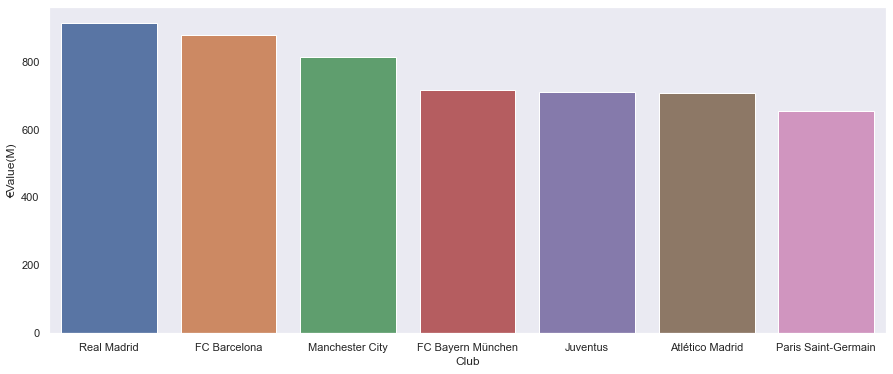

In [707]:
# Plotting the top 7 richest clubs
plt.subplots(figsize = (15,6))

sb.barplot(x = "Club",
            y = '€Value(M)',
            data = Best_economical_club_fifa19_value,
            palette = 'deep')

plt.show()

### 4. Find the strength of association between players age and overall performance and use scatter plot to display them

In [710]:
fifaplayers_copy2 = master_data.copy()
fifaplayers_copy2.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [711]:
# Creating a dataframe with age and performance columns
age_performance = fifaplayers_copy2[['Age','Overall','Potential']]

In [717]:
age_performance.head()

,Age,Overall,Potential,AgeGroup
0,31,94,94,Adults
1,33,94,94,Adults
2,26,92,93,Adults
3,27,91,93,Adults
4,27,91,92,Adults


In [715]:
#Check for null values
age_performance.isnull().sum()

Age          0
Overall      0
Potential    0
dtype: int64

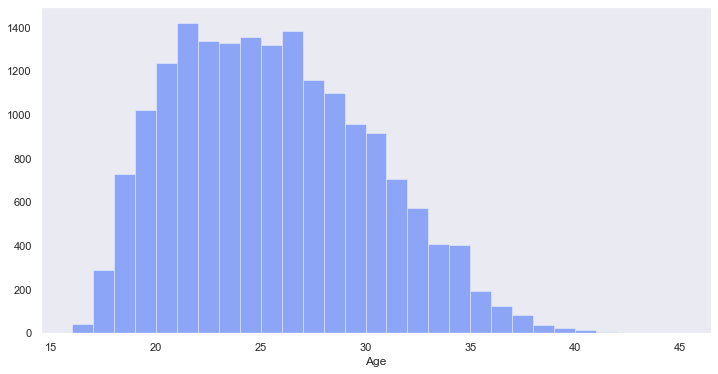

In [714]:
#Plotting the age distribution among players
plt.subplots(figsize=(12,6))

sb.distplot(age_performance["Age"],
             bins = 29,
             kde = False)

plt.show()

In [718]:
# Creating age slabs
for row_index,row in age_performance.iterrows():
    if row.Age >= 35:
        age_performance.loc[row_index,'AgeGroup'] = 'Seniors'
    elif (row.Age >= 25) & (row.Age < 35) :
        age_performance.loc[row_index,'AgeGroup'] = 'Adults'
    elif (row.Age >= 20) & (row.Age < 25) :
        age_performance.loc[row_index,'AgeGroup'] = 'Youth'
    else:
        age_performance.loc[row_index,'AgeGroup'] = 'YoungLads'

In [721]:
age_performance.AgeGroup.unique()

array(['Adults', 'Youth', 'YoungLads', 'Seniors'], dtype=object)

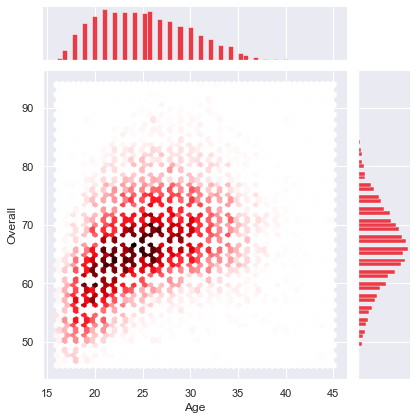

In [731]:
with sb.axes_style("darkgrid"): #The darker hexagon represents the high density
    
    sb.jointplot('Age',
                  'Overall',
                   data = age_performance,
                   kind = 'hex',
                   color = 'r')
    
plt.show()

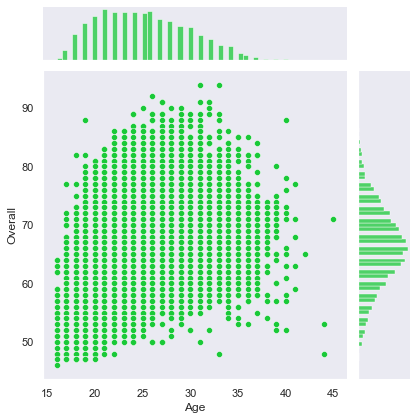

In [726]:
sb.jointplot('Age',
                  'Overall',
                   data = age_performance,
                   color = 'g')
plt.show()

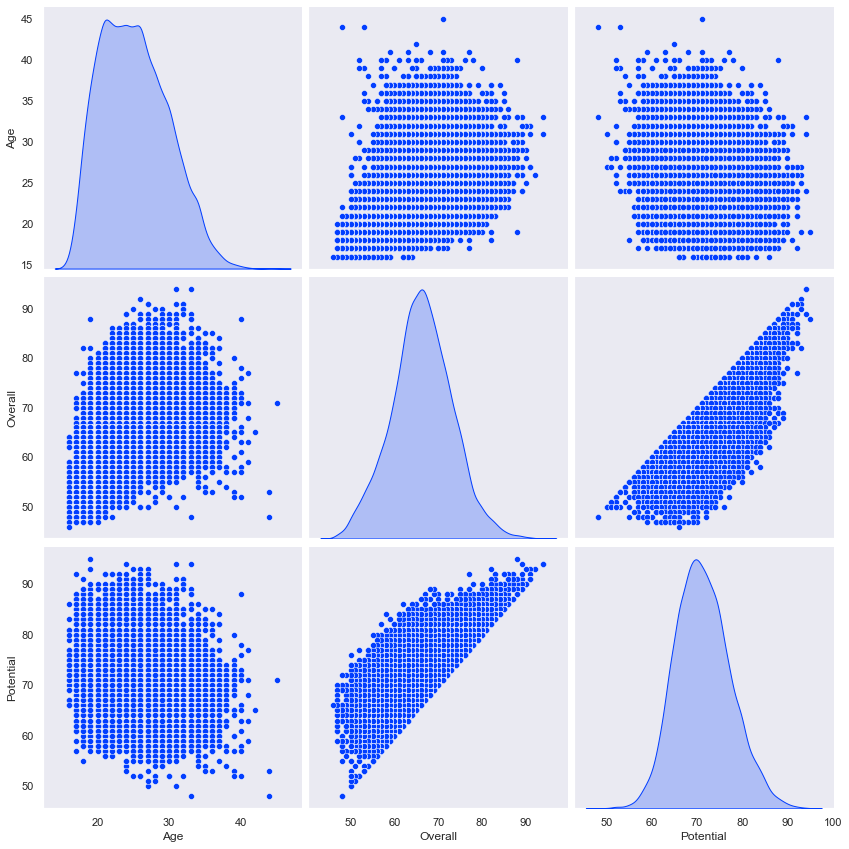

In [728]:
sb.pairplot(age_performance,
             height = 4,
             vars = ["Age",
                     "Overall",
                     "Potential"],
             diag_kind = "kde")

plt.show()

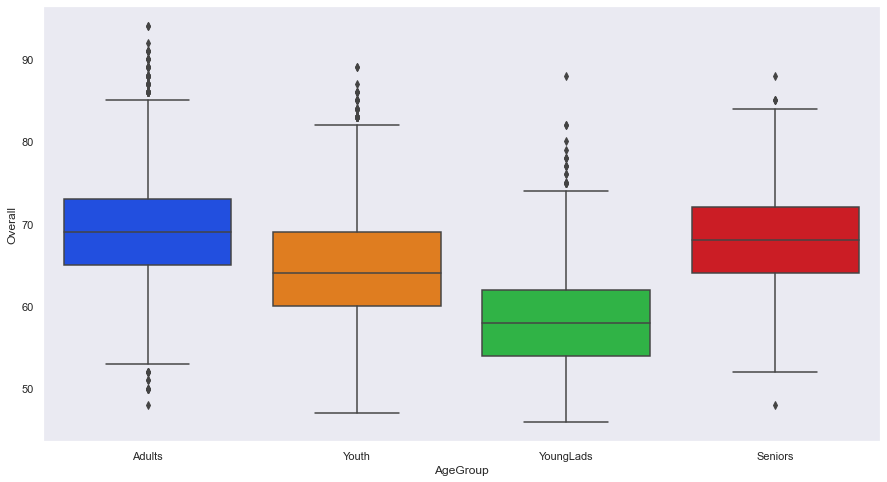

In [741]:
#Plotting the box plot based on age groups
plt.subplots(figsize = (15,8))

sb.boxplot(x = "AgeGroup",
            y = "Overall",
            data = age_performance)

plt.show()

In [749]:
age_performance.describe()

,Age,Overall,Potential
count,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299
std,4.669943,6.908930,6.136496
min,16.000000,46.000000,48.000000
25%,21.000000,62.000000,67.000000
50%,25.000000,66.000000,71.000000
75%,28.000000,71.000000,75.000000
max,45.000000,94.000000,95.000000


In [767]:
stat = ['count','mean','std','min','25%','50%','75%','max']

In [768]:
age_performance_stat = pd.DataFrame(age_performance.describe())

In [769]:
age_performance_stat.reset_index(drop = True)

,Age,Overall,Potential
0,18207.000000,18207.000000,18207.000000
1,25.122206,66.238699,71.307299
2,4.669943,6.908930,6.136496
3,16.000000,46.000000,48.000000
4,21.000000,62.000000,67.000000
5,25.000000,66.000000,71.000000
6,28.000000,71.000000,75.000000
7,45.000000,94.000000,95.000000


In [770]:
age_performance_stat['StatisticalParameters'] = stat

In [771]:
age_performance_stat.shape

(8, 4)

In [777]:
age_performance_stat = age_performance_stat.reset_index(drop = True)

In [783]:
age_performance_stat = age_performance_stat.loc[1:,:]

In [784]:
age_performance_stat

,Age,Overall,Potential,StatisticalParameters
1,25.122206,66.238699,71.307299,mean
2,4.669943,6.908930,6.136496,std
3,16.000000,46.000000,48.000000,min
4,21.000000,62.000000,67.000000,25%
5,25.000000,66.000000,71.000000,50%
6,28.000000,71.000000,75.000000,75%
7,45.000000,94.000000,95.000000,max


<AxesSubplot:xlabel='StatisticalParameters'>

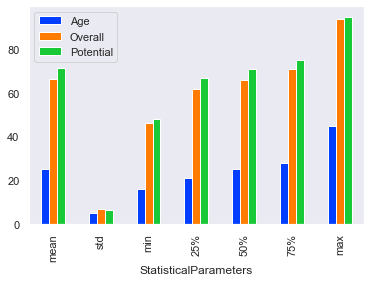

In [785]:
age_performance_stat.plot(x='StatisticalParameters',y=['Age','Overall','Potential'], kind = 'bar')